In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# url = "https://raw.githubusercontent.com/rebekz/datascience_course/main/data/rollingsales/rollingsales_brooklyn_2016.20160830.csv"
data = pd.read_csv('rollingsales_brooklyn.csv')
data.head()

,Unnamed: 0,borough,neighborhood,building.class.category,tax.class.at.present,block,lot,ease.ment,building.class.at.present,address,...,total.units,year.built,tax.class.at.time.of.sale,building.class.at.time.of.sale,sale.date,sale.price,gross.square.feet,land.square.feet,furnished.at.time.of.sale,year_group
0,1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,NaN,A5,8647 15TH AVENUE,...,1,1930,1,A5,3/31/15,758000.0,1428,1547,1,< 1940
1,2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,NaN,A5,55 BAY 10TH STREET,...,1,1930,1,A5,6/15/15,778000.0,1660,1933,1,< 1940
2,3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,NaN,S1,1906 86TH STREET,...,2,1931,1,S1,5/29/15,1365000.0,2090,1900,1,< 1940
3,4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,NaN,A1,50 BAY 23RD STREET,...,1,1930,1,A1,12/17/15,750000.0,1672,2417,1,< 1940
4,5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,NaN,S1,1964 86TH STREET,...,2,1925,1,S1,05/06/2015,1470000.0,2112,1725,1,< 1940


In [120]:
# Daerah Termahal dan Termurah Harga Rumah
top_3_expensive_areas = data.groupby('neighborhood')['sale.price'].mean().sort_values(ascending=False).head(3)
top_3_cheap_areas = data.groupby('neighborhood')['sale.price'].mean().sort_values().head(3)
print("Daerah Termahal Harga Rumah:")
print(top_3_expensive_areas)
print("\nDaerah Termurah Harga Rumah:")
print(top_3_cheap_areas)

Daerah Termahal Harga Rumah:
neighborhood
BROOKLYN HEIGHTS             6.379000e+06
BROOKLYN-UNKNOWN             4.579000e+06
COBBLE HILL                  4.527826e+06
Name: sale.price, dtype: float64

Daerah Termurah Harga Rumah:
neighborhood
BROWNSVILLE                  368538.048780
GERRITSEN BEACH              382671.226415
EAST NEW YORK                420083.964953
Name: sale.price, dtype: float64


In [121]:
# Jenis Property yang Paling Banyak Dijual di Brooklyn Tahun 2015
property_counts = data[data['sale.date'].str.contains('2015')]['building.class.category'].value_counts()
most_sold_property_type = property_counts.idxmax()
print("\nJenis Property yang Paling Banyak Dijual di Brooklyn Tahun 2015:")
print(most_sold_property_type)


Jenis Property yang Paling Banyak Dijual di Brooklyn Tahun 2015:
02  TWO FAMILY DWELLINGS


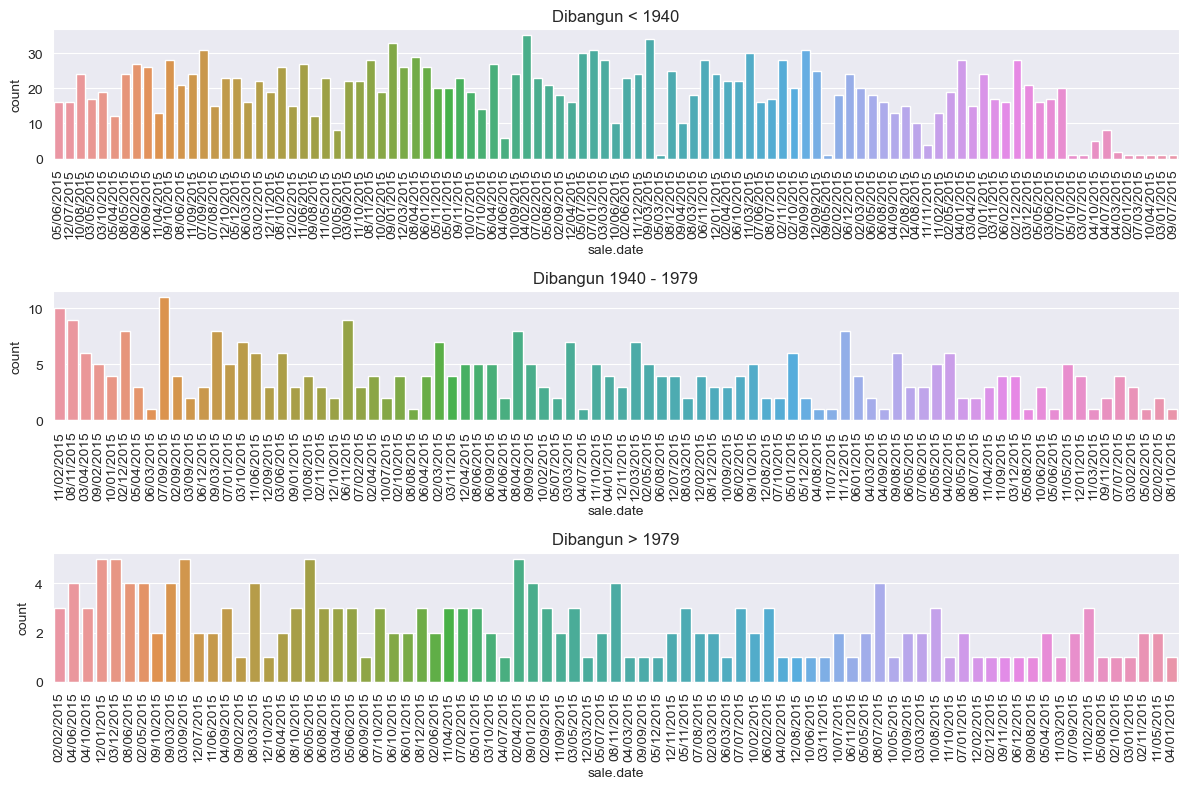

In [122]:
# Trend Penjualan Property di Tahun 2015 berdasarkan Tahun Pembangunan
data['year.built'] = data['year.built'].astype(str).str[:4].astype(int)
data_2015 = data[data['sale.date'].str.contains('2015')]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.countplot(data=data_2015[data_2015['year.built'] < 1940], x='sale.date')
plt.title("Dibangun < 1940")
plt.xticks(rotation=90)

plt.subplot(3, 1, 2)
sns.countplot(data=data_2015[(data_2015['year.built'] >= 1940) & (data_2015['year.built'] <= 1979)], x='sale.date')
plt.title("Dibangun 1940 - 1979")
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)
sns.countplot(data=data_2015[data_2015['year.built'] > 1979], x='sale.date')
plt.title("Dibangun > 1979")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

selected_features = ['gross.square.feet', 'total.units', 'sale.price']
data_selected = data[selected_features]
data_cleaned = data_selected.dropna()

X = data_cleaned[['gross.square.feet', 'total.units']]
y = data_cleaned['sale.price']

print(X)
print(y)

      gross.square.feet  total.units
0                  1428            1
1                  1660            1
2                  2090            2
3                  1672            1
4                  2112            2
...                 ...          ...
6673               3600            3
6674               3000            3
6675               3300            3
6676               3300            3
6677               3480            3

[6678 rows x 2 columns]
0        758000.0
1        778000.0
2       1365000.0
3        750000.0
4       1470000.0
          ...    
6673     770000.0
6674     775000.0
6675     487000.0
6676     450000.0
6677     995000.0
Name: sale.price, Length: 6678, dtype: float64


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [125]:
X_train

,gross.square.feet,total.units
5838,3410,3
4975,1792,2
5019,1809,2
3568,3312,2
2350,2382,2
...,...,...
4931,3272,2
3264,1620,2
1653,2720,1
2607,1840,2


In [126]:
# Membangun model regresi linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [135]:
coefficients = regression_model.coef_
intercept = regression_model.intercept_

print("Persamaan Regresi:")
print("Harga Property = {:.2f} * Gross Square Feet + {:.2f} * Total Units + {:.2f}".format(coefficients[0], coefficients[1], intercept))

Persamaan Regresi:
Harga Property = 302.65 * Gross Square Feet + -253581.87 * Total Units + 720668.63
